# Intelligent Handwritten Digit Recognition Using CNN Model 

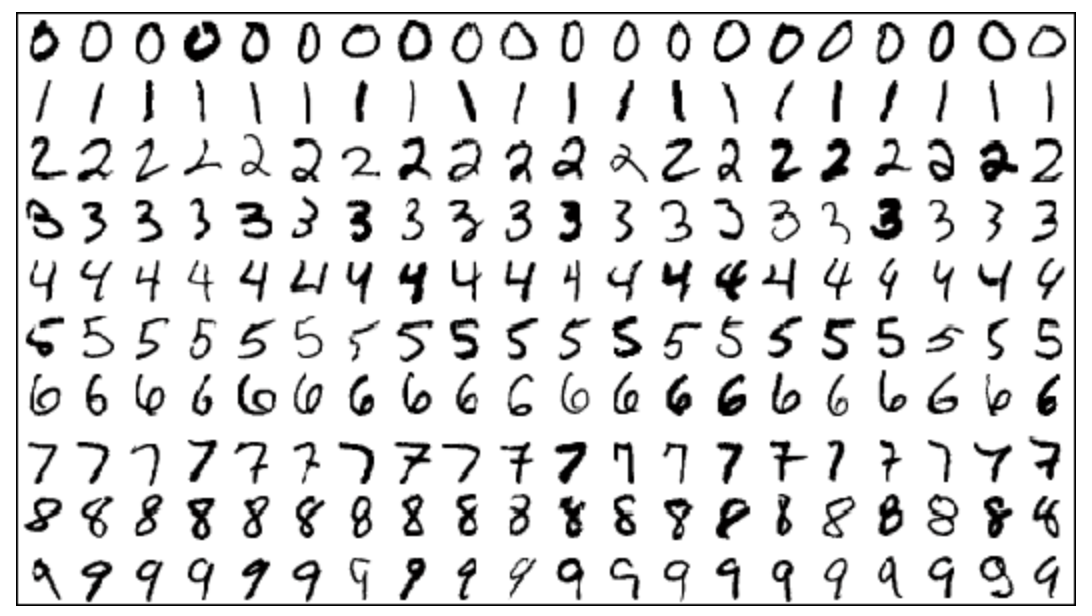

In [2]:
from IPython.display import Image
Image(filename='handwritten_image.png') 

## 1. Data Preparation

### 1.1 Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

In [2]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [3]:
train.head(30)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print('Training data shape : ', test.shape)

Training data shape :  (28000, 784)


In [5]:
print('Training data shape : ', train.shape)

Training data shape :  (42000, 785)


The test data set, (test.csv), is the same as the training set, (train.csv) except that it does not contain the "label" column.

In [6]:
#seperate images and labels in train.csv
X_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]

In [7]:
X_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train.head(5)

,label
0,1
1,0
2,1
3,4
4,0


### 1.2 Check Null Value

In [9]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
y_train.isnull().any().describe()

count         1
unique        1
top       False
freq          1
dtype: object

There is no null value in the training set.

### 1.3 Visualize the data

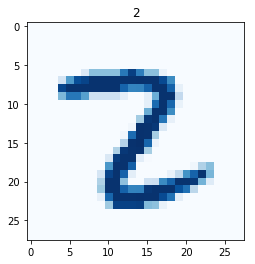

In [11]:
i=24
img=X_train.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='Blues')
plt.title(y_train.iloc[i,0])

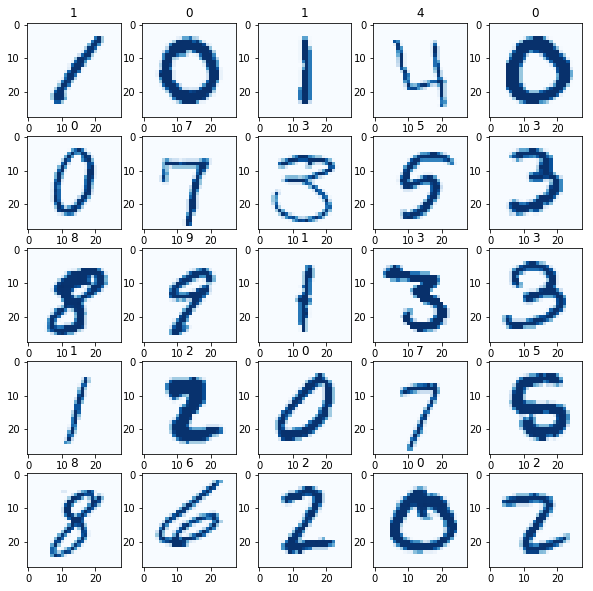

In [12]:
plt.figure(figsize=(10,10))
y, x = 5,5
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    img=X_train.iloc[i].as_matrix()
    img=img.reshape((28,28))
    plt.imshow(img,cmap='Blues')
    plt.title(y_train.iloc[i,0],)

## 2. Data Reshaping

### 2.1 Reshape and Normalize Data

In [13]:
import keras
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # the two types of neural network layer we will be using
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint
import seaborn as sns

/home/ubuntu/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
num_train = train.shape[0]
num_train

42000

In [15]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)

X_train shape (42000, 784)
y_train shape (42000, 1)


CNN Model requires one more dimension, so we will reshape the data to (-1,28,28,1)

In [16]:
#Convert Data type to array
X_train = X_train.as_matrix()
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
y_train

,label
0,1
1,0
2,1
3,4
4,0
5,0
6,7
7,3
8,5
9,3


In [18]:
y_train=y_train["label"]

In [19]:
y_train=y_train.reshape(1,42000)

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [20]:
y_train=np.reshape(y_train,(np.product(y_train.shape),))
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [21]:
# The data right now is in an int64 format, 
# so before you feed it into the network you need to convert its type to float32, 
# and you also have to rescale the pixel values in range 0 - 1 inclusive. 
X_train = X_train.astype('float32') 
test = test.astype('float32') 
X_train /= 255 # Normalise data to [0, 1] range
test /= 255 # Normalise data to [0, 1] range

In [22]:
print("X_train shape", X_train.shape)
print("test shape", test.shape)

X_train shape (42000, 784)
test shape (28000, 784)


In [23]:
X_train = X_train.reshape(-1, 28,28, 1)
X_train.shape

(42000, 28, 28, 1)

In [24]:
test = test.as_matrix()
test = test.reshape(-1, 28,28, 1)
test.shape

(28000, 28, 28, 1)

### 2.2 One-hot encoding the labels

In [25]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Since y_train is a categorical variable, which the computer may not understand, we will use one-hot encoding to convert it to binary variable.

In [26]:
Y_train = to_categorical(y_train, nClasses) # One-hot encode the labels
# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', Y_train[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### 2.3 Split train and validation set

In [27]:
train_X,valid_X,train_label,valid_label = train_test_split(X_train, Y_train, test_size=0.1, random_state=13)

In [28]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

4,200 rows of data would be enough for validation.

In [29]:
train_X

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## 3. Start Modeling

### 3.1 Create CNN Model

In [1]:
#Batch size is used to specify the number of observation after which you want to update weight. 
#Epoch is nothing but the total number of iterations. 
#Choosing the value of batch size and epoch is trial and error there is no specific rule for that.
batch_size = 256 # in each iteration, we consider 256 training examples at once
num_epochs = 35 # we iterate 35 times over the entire training set

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(nClasses, activation='softmax'))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
__________

### 3.2 Fit the model

In [34]:
model.compile(loss=keras.losses.categorical_crossentropy,  # using the cross-entropy loss function
              optimizer=keras.optimizers.Adam(), # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

In [34]:
# monitor is defined as val_acc，output coordinating information，
# and show the best val_acc, which is the highest val_acc
check_pointer = ModelCheckpoint(filepath="weights.best.hdf5", monitor='val_acc', verbose=1, save_best_only=True)

In [35]:
np.random.seed(12345)

model_train = model.fit(train_X, train_label, 
                        batch_size=batch_size,
                        epochs=num_epochs,
                        verbose=1,
                        validation_data=(valid_X, valid_label), callbacks=[check_pointer])

Train on 37800 samples, validate on 4200 samples
Epoch 1/35
37800/37800 [==============================] - 33s 871us/step - loss: 0.5961 - acc: 0.8004 - val_loss: 0.1160 - val_acc: 0.9650

Epoch 00001: val_acc improved from -inf to 0.96500, saving model to weights.best.hdf5
Epoch 2/35
37800/37800 [==============================] - 33s 861us/step - loss: 0.1363 - acc: 0.9575 - val_loss: 0.0615 - val_acc: 0.9786

Epoch 00002: val_acc improved from 0.96500 to 0.97857, saving model to weights.best.hdf5
Epoch 3/35
37800/37800 [==============================] - 32s 858us/step - loss: 0.0991 - acc: 0.9692 - val_loss: 0.0515 - val_acc: 0.9810

Epoch 00003: val_acc improved from 0.97857 to 0.98095, saving model to weights.best.hdf5
Epoch 4/35
37800/37800 [==============================] - 32s 856us/step - loss: 0.0790 - acc: 0.9751 - val_loss: 0.0429 - val_acc: 0.9857

Epoch 00004: val_acc improved from 0.98095 to 0.98571, saving model to weights.best.hdf5
Epoch 5/35
37800/37800 [==============

We rebuilt the model, and loaded the best result in training data.

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(nClasses, activation='softmax'))

In [32]:
model.load_weights("weights.best.hdf5")

In [34]:
model.compile(loss=keras.losses.categorical_crossentropy,  # using the cross-entropy loss function
              optimizer=keras.optimizers.Adam(), # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

## 4. Evaluate the model

### 4.1 Confusion Matrix

In [35]:
final_loss, final_acc = model.evaluate(valid_X, valid_label, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0209, final accuracy: 0.9938


In [36]:
y_hat = model.predict(valid_X)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(valid_label, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[397   0   1   0   0   0   0   0   1   0]
 [  0 468   0   0   0   0   0   4   0   0]
 [  0   0 388   1   0   0   0   2   0   1]
 [  1   0   1 431   0   0   0   0   1   1]
 [  0   0   0   0 438   0   0   0   0   0]
 [  0   0   0   0   0 401   0   0   1   0]
 [  1   1   0   0   0   0 401   0   0   0]
 [  0   0   1   0   0   0   0 430   0   0]
 [  0   0   0   0   1   1   0   0 407   1]
 [  0   0   0   0   1   1   0   1   2 413]]


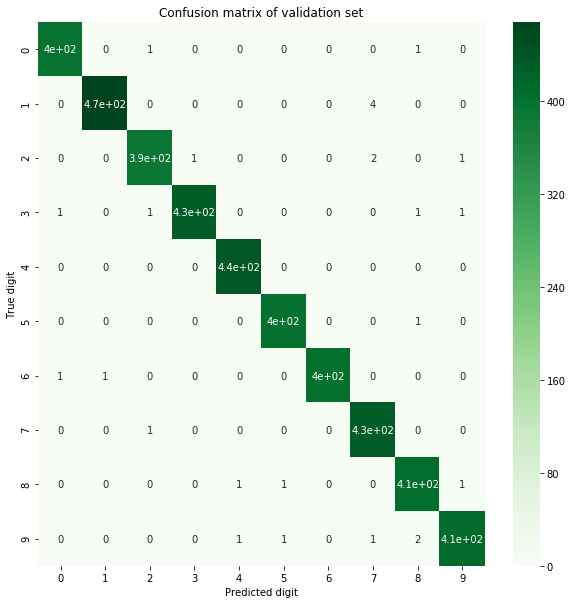

In [37]:
## show confusion matrix
labels_array = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fig, ax = plt.subplots(1,figsize=(10,10))
ax = sns.heatmap(cm, ax=ax, cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(labels_array)
ax.set_yticklabels(labels_array)
plt.title('Confusion matrix of validation set')
plt.ylabel('True digit')
plt.xlabel('Predicted digit')
plt.show();

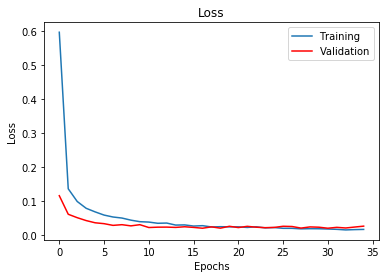

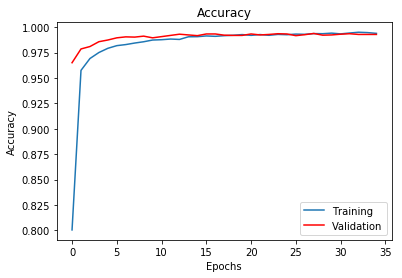

In [42]:
# show the loss and accuracy
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
acc = model_train.history['acc']
val_acc = model_train.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

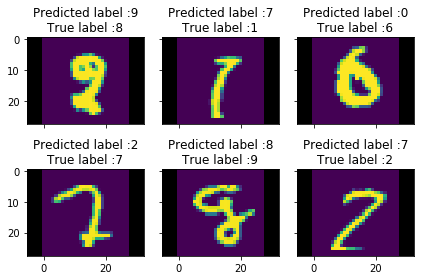

In [55]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (y_pred - y_true != 0)

Y_pred_classes_errors = y_pred[errors]
Y_pred_errors = y_hat[errors]
Y_true_errors = y_true[errors]
X_val_errors = valid_X[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].set_facecolor((0, 0, 0))
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
        fig.tight_layout()

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

### 4.2 Submit prediction results to Kaggle

In [43]:
output = model.predict(test)

In [44]:
pred = np.argmax(output,axis=1)

In [45]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(pred)+1)),
                         "Label": pred})

In [46]:
submissions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [47]:
submissions.to_csv('submission.csv',index=False)

## Final score: 0.99457